In [32]:
"""
chapter 3
"""

# import libs 

import numpy as np 
import matplotlib.pyplot as plt 

from sklearn import datasets 
# from sklearn.cross_validation import train_test_split  # deprecation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import export_graphviz

from utils import *   # plot_decision_regions 

In [27]:
# P 76 
# import data from sklearn 
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # numpy array 
y = iris.target  # numpy array 

In [9]:
# split the datasets into separate training ad test data sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# standardize the features 
sc = StandardScaler()
sc.fit(X_train)  # fit: estimated the parameters: sample mean & standard deviation 
X_train_std = sc.transform(X_train)  # use the transform method to standardized the training and testing data  
X_test_std = sc.transform(X_test)

Misclassified samples: 4
accuracy: 0.9111111111111111


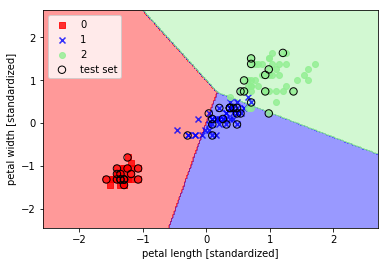

In [23]:
# ----------------- perceptron -----------------------------
# train a perceptron model 
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)  # eta0: learning rate, random_state: the initial shuffling of the training dataset after each epoch  
ppn.fit(X_train_std, y_train)

# make predictions 
y_pred = ppn.predict(X_test_std)
print(f"Misclassified samples: {(y_test != y_pred).sum()}")
# calculate the classification accuracy 
print(f'accuracy: {accuracy_score(y_test, y_pred)}')


# plot the result: specify the indices of the samples 
# P 79
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left')
plt.show()

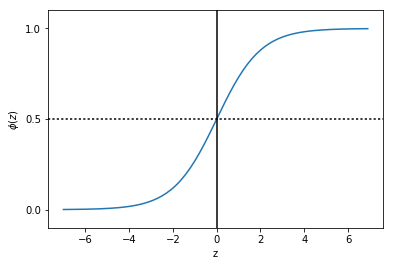

In [12]:
# logistic function 
# P 82


# plot the sigmod function  
z = np.arange(-7, 7, 0.1)
phi_z = sigmod(z)  # from utils 

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show() 

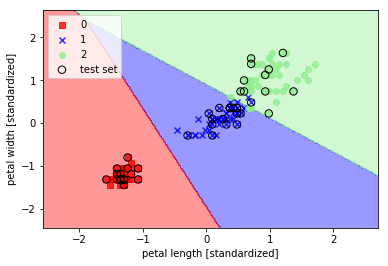

In [13]:
# ------------------- logistic regression ----------------
# logistic regression
lr = LogisticRegression(C=1000.0, random_state=0)  # C=1/lambda, lambda: L2regularizatio parameter
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

C:\Conda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


 classes: [0 1 2] 
 probability: [[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


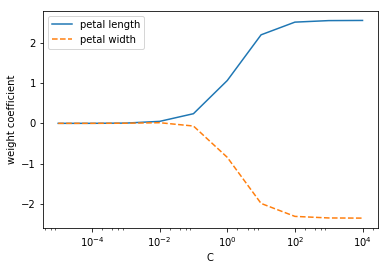

In [14]:
# logistic regression parameter
# get the class membership probability 
c = lr.classes_  # class names 
p = lr.predict_proba(X_test_std[0, :])  # probability of each class  
print(f' classes: {c} \n probability: {p}')


# C: inverse regularization parameter 
weights, params = [], []
for c in range(-5,5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

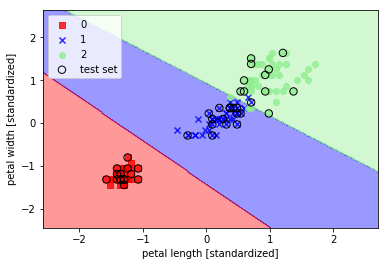

In [15]:
# ------------------- support vector machine ----------------
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


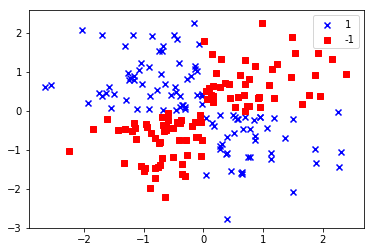

In [16]:
# ----------- create non-linear data --------------------
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

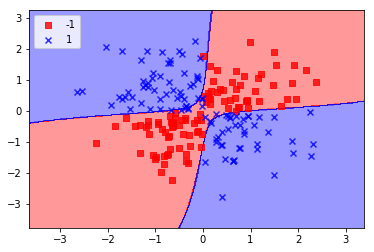

In [17]:
# ---------------- SVM RBF kernel ----------------------
# SVM separates the xor data well  
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

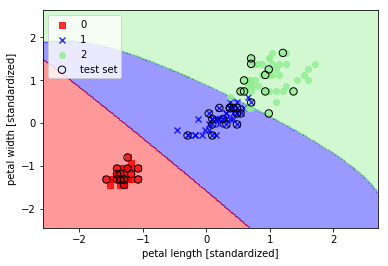

In [18]:
# kennerl svm parameter: gamma
# the cut-off parameter for the Gaussian sphere 
# increase gamma will the influence of the training samples
# --> leads to a softer decision boundary

# relatively small value for gamma --> gamma=0.2
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

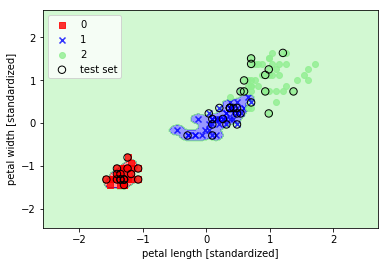

In [19]:
# increase the value of gamma --> gamma=100
# the decision boundary around the class 0 & class 1 is much tighter 
# likely have a high generalization error on unseen data 
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

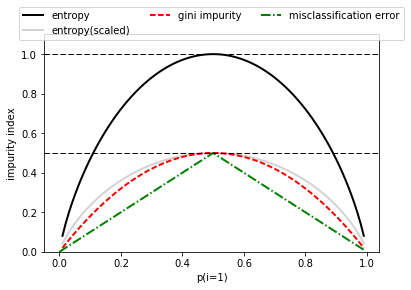

In [20]:
# ------------------- decision tree ------------------

# commonly used impurity measures
# Gini index is an intermediate measure between entropy and the classification error

def gini(p):
    return p * (1-p) + (1-p) * (1 - (1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

def classification_error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)  # (start, end, step)
gi = [gini(p) if p!=0 else None for p in x]  # gini 
ent = [entropy(p) if p!=0 else None for p in x]  # entrop 
sc_ent = [e*0.5 if e else None for e in ent]  # scaled version of the entropy 
err = [classification_error(i) for i in x]  # classification error 

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gi, err], 
                         ['entropy', 'entropy(scaled)', 'gini impurity', 'misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()


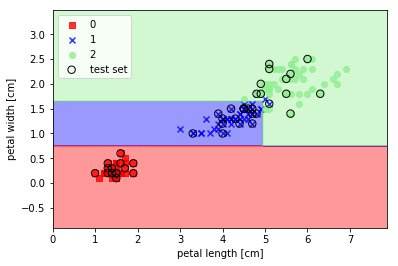

In [25]:
# building a decision tree 
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]') 
plt.legend(loc='upper left')
plt.show()

In [28]:
# scikit-learn can export the decision tree as .dot file 
# --> can be visualized using GraphViz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
'''
dot -Tpng tree.dot -o tree.png
'''

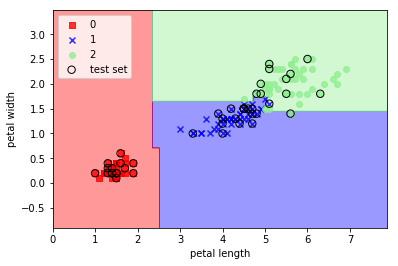

In [31]:
# ------------------------- random forest -----------------------------
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
# n_jobs: parallelize the model training using multiple cores
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

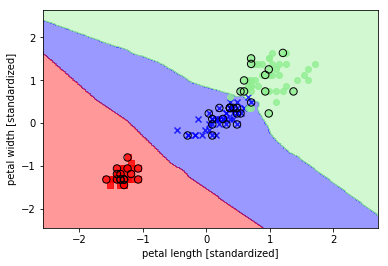

In [33]:
# --------- k nearest neighbors --------------------------------
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()